In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_path = os.path.join('data', 'bike_clean.csv')
bikes = pd.read_csv(bike_path)

In [3]:
bikes.head()

,bike_id,bike_type,passholder_type,duration,trip_route_category,estimated_fare,temperature,humidity,windspeed,weather,start_station,end_station,start_time,end_time,start_lat_lon,end_lat_lon
0,12017,standard,Walk-up,26,One Way,1.75,54,17,5,Few Clouds,3005.0,3082.0,2018-12-31 23:56:00,2019-01-01 00:22:00,"(34.0485, -118.25853700000002)","(34.04652, -118.23741100000001)"
1,12128,standard,Walk-up,28,One Way,1.75,54,17,5,Few Clouds,3005.0,3082.0,2018-12-31 23:54:00,2019-01-01 00:22:00,"(34.0485, -118.25853700000002)","(34.04652, -118.23741100000001)"
2,12347,standard,Walk-up,97,One Way,7.00,54,17,5,Few Clouds,4211.0,4210.0,2018-12-31 23:51:00,2019-01-01 01:28:00,"(33.984928000000004, -118.46996299999999)","(33.984341, -118.47155)"
3,5730,standard,Walk-up,7,Round Trip,1.75,54,17,5,Few Clouds,3069.0,3069.0,2018-12-31 23:47:00,2018-12-31 23:54:00,"(34.05088, -118.248253)","(34.05088, -118.248253)"
4,6222,standard,Walk-up,9,Round Trip,1.75,54,17,5,Few Clouds,3069.0,3069.0,2018-12-31 23:46:00,2018-12-31 23:55:00,"(34.05088, -118.248253)","(34.05088, -118.248253)"


We will now be investigating the impact of weather on bike ridership. Since Los Angeles resides within sunny California, we can anticipate some active year-round activity. But how exactly does ridership change with different termperatures, windspeeds, humidities, or overall weather conditions?

Lets begin by seeing the conditions people prefer to bike in.

In [4]:
weather_cnts = bikes['weather'].value_counts().to_frame(name='trips')
weather_cnts

,trips
Few Clouds,192663
Scattered Clouds,143130
Broken Clouds,115100
Clear,95547
Overcast,43365
Haze,22024
Mist,15749
Patches of Fog and Mist,3664
Fog,2386
Patches of Fog,1341


That's a lot of variability! Lets focus on the top 10 as they make up 99% of the total trips.

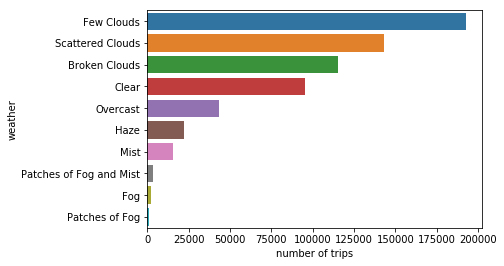

In [5]:
top_10 = weather_cnts.reset_index().rename(columns={'index': 'weather'})[:10]
sns.barplot(y='weather', x='trips', data=top_10)
plt.xlabel('number of trips');

As can be expected, people prefer to bike in clearer conditions. Once clouds begin to fill the sky, some mist begins to fall, or fog gets in the way of riders' visibility, biking isn't so popular...

Let's investigate some other factors.

,count,mean,std,min,25%,50%,75%,max
temperature,639786.0,67.806199,6.909786,41.0,63.0,68.0,72.0,103.0
humidity,639786.0,65.564731,18.861341,3.0,59.0,69.0,78.0,100.0
windspeed,639786.0,9.416453,4.746579,0.0,6.0,9.0,13.0,33.0


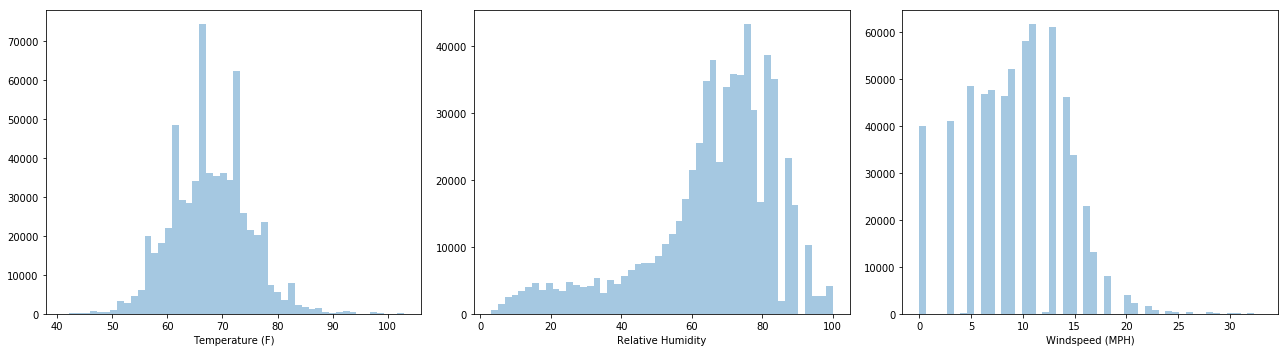

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.distplot(bikes['temperature'], ax=axes[0], hist=True, axlabel='Temperature (F)', kde=False)
sns.distplot(bikes['humidity'], ax=axes[1], hist=True, axlabel= 'Relative Humidity', kde=False)
sns.distplot(bikes['windspeed'], ax=axes[2], hist=True, axlabel= 'Windspeed (MPH)', kde=False)
plt.tight_layout()
bikes[['temperature', 'humidity', 'windspeed']].describe().T

Again, we see that people choose to bike in ideal conditions. According to our plots, the typical bike rider prefers to bike during times of visible skies, temperatures in the high 60s, moderate humidity, and subtle windspeeds. Overall, this is not surprising. Who would want to bike, or even go outside, during undesirable conditions? 

We should now investigate how weather conditions affect biking habits, most notably duration.

In [7]:
bikes.groupby('weather')['duration'].mean().sort_values(ascending=False).to_frame(name='duration')

,duration
weather,
Heavy Rain and Fog,735.000000
Drizzle and Mist,705.000000
Partial Fog,633.000000
Thunderstorm in Vicinity with Rain and Mist,590.000000
Drizzle and Fog,300.000000
Patches of Fog,275.073080
Fog,274.663034
Rain and Mist,232.170854
Light Rain and Mist,205.228916


According to the table above, people choose to bike the longest during more treacherous conditions... This seems to completely go against our previous findings of people predominently biking during ideal conditions. However, we should recall what Metro Bike Share stated about the preprocessing of their data.

> * Some short round trips or long trips may be the result of system or user error, but have been kept in the dataset for completeness.

We can safely assume that this is the cause of this discrepency. Unless, of course, some riders like to bike for over 700 minutes in heavy rain, fog, and conditions alike... 

Also important to notice, the vast majority of the weather conditions with the highest duration in this table were at the bottom of our number of trips table above (<1% of trips) so we can infer that these durations do not reflect typical biking habits. 

We will again focus on the top 10 weather conditions. Because the distributions of durations for almost all weather conditions are heavily right skewed, we will be using the **median instead of the mean** to quanitify duration. Also, because we are focusing on the _typical_ and _real_ bike rider, we will max out the duration at the **85th percentile** as much of the suspicious data lies past this point as highlighted below. This suspicious data and skew is most likely due to the same reason as above.

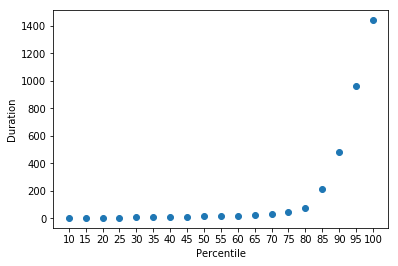

In [8]:
percentiles = []

for i in np.arange(10, 101, 5):
    percentiles.append(np.percentile(bikes['duration'], i))

plt.scatter(x=np.arange(10, 101, 5), y=percentiles)
plt.xticks(np.arange(10, 101, 5))
plt.ylabel('Duration')
plt.xlabel('Percentile');

In [9]:
eighty_five = np.percentile(bikes['duration'], 85)
print('The 85th percentile is %s minutes!' %eighty_five)

The 85th percentile is 213.0 minutes!


Lets now fix this and continue on with out analysis!

weather,Scattered Clouds,Haze,Few Clouds,Broken Clouds,Patches of Fog and Mist,Patches of Fog,Overcast,Clear,Mist,Fog
median duration,12,12,12,12,11,11,11,11,10,10


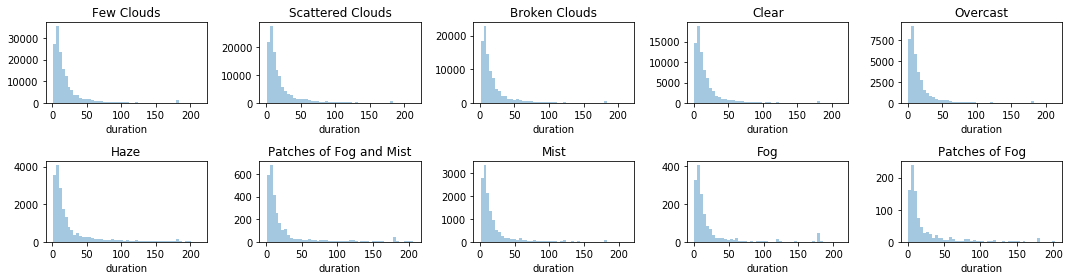

In [10]:
# Calculating median duration for each weather type
pop_weather = weather_cnts.index[:10]
weather_10 = bikes[(bikes['weather'].isin(pop_weather)) & (bikes['duration'] <= eighty_five)]
display(weather_10
        .groupby('weather')['duration'].median()
        .sort_values(ascending=False).to_frame(name='median duration').T)

# Plotting histograms of durations
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,4))

cols = 0
rows = 0
for col in weather_10['weather'].unique():
    sns.distplot(weather_10[weather_10['weather'] == col]['duration'], 
                 ax=axes[rows, cols], 
                 hist=True, 
                 kde=False)
    
    axes[rows, cols].set_title(col)
    
    cols += 1
    if cols >= 5:
        rows = 1
        cols = 0
        
plt.tight_layout()

As can be seen above, there does not seem to be a whole lot of variability in the duration people ride the bikes for. We do see a bit more fluctuation in hazy/foggy conditions compared to clearer conditions, but nothing drastic. The median durations are relatively the same, ranging from 10 minutes to 12 minutes. This is quite surprising as we would expect people to bike longer when in ideal conditions but such does not seem to be the case.

Lets see if we can find some connections between duration and the other weather attributes.

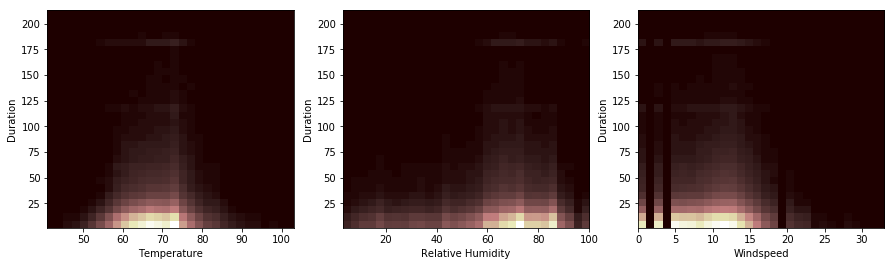

In [11]:
# Plotting heat maps for weather attributes vs duration
# Given the shear amount of data points, scatter plots were not ideal

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

axes[0].hist2d(weather_10['temperature'],weather_10['duration'], bins=30, cmap=plt.cm.pink)
axes[1].hist2d(weather_10['humidity'],weather_10['duration'], bins=30, cmap=plt.cm.pink)
axes[2].hist2d(weather_10['windspeed'],weather_10['duration'], bins=30, cmap=plt.cm.pink)

axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Duration')
axes[1].set_xlabel('Relative Humidity')
axes[1].set_ylabel('Duration')
axes[2].set_xlabel('Windspeed')
axes[2].set_ylabel('Duration');

These heatmaps greatly resemble the histograms we plotted earlier in this notebook for these weather attributes. The most notable connection is temperature and duration. We can see a cone-like formation within the heatmap. Those who bike in temperatures ranging from 60-70 degrees seem to bike the longest. However, this connection could possibly be explained by the fact that the majority of the trips in our data set happen within this temperature range. Likewise, this could be the explanation for these heatmaps resembling the histograms from earlier in our analysis.

One feature that is abundantly clear from our analysis thus far is the small durations people are biking for. We can see the heatmaps above die off around the 20-30 minute mark and our previous plots have also shown this trend. Why may this be?

If we take another look at the Metro Bike Share pricing at the start of this notebook, they charge bikers in **30 minute intervals** and all bikers who have a membership, except walk-ups, get the first 30 minutes free and pay a small fee thereafter. Rather than weather playing the largest role in duration, it may instead be the price of riding the bikes! 

With this said, it is natural for us to explore the effects of fare on bike ridership. Lets do some quick analysis of the data.

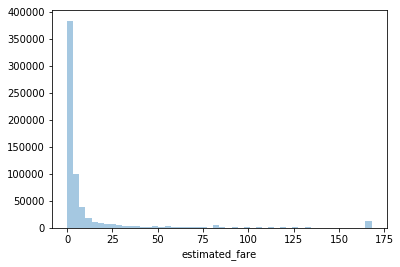

In [12]:
sns.distplot(bikes['estimated_fare'], kde=False);

As most distributions that deal with money, the fare histogram for this dataset is heavily right skewed. Since we have already become aware of the discrepencies in our dataset, we will focus on the trips we feel are real. We will max out fare at the **90th percentile** as this data seems the most reliable as highlighted below.

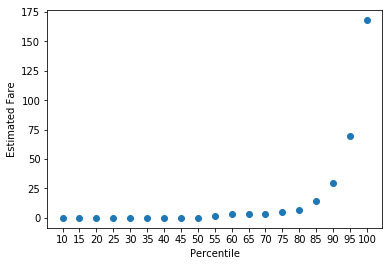

In [64]:
# Determining where the most probable bike trips
# Those in the 95th and 100th percentiles had trips of several hours!

percentiles = []

for i in np.arange(10, 101, 5):
    percentiles.append(np.percentile(bikes['estimated_fare'], i))

plt.scatter(x=np.arange(10, 101, 5), y=percentiles)
plt.xticks(np.arange(10, 101, 5))
plt.ylabel('Estimated Fare')
plt.xlabel('Percentile');

In [65]:
ninety = np.percentile(bikes['estimated_fare'], 90)
print('The 90th percentile is %s dollars!' %ninety)

The 90th percentile is 29.75 dollars!


Also, during our data cleaning, we noted that Metro Bike Share cut their pricing on July 12, 2018. We should split the dataset on this date to get an accurate representation of the effect of fare on bike ridership and not intertwine the different pricing. To see the huge divide in our data set, lets plot fare vs duration (as bikers prior to the cut would pay more) without separating on price cut dates.

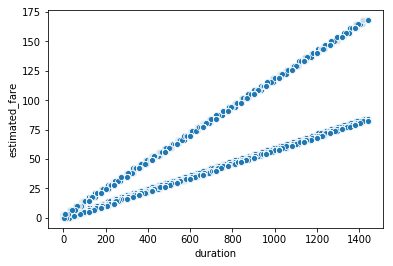

In [66]:
sns.scatterplot(x=bikes['duration'], y=bikes['estimated_fare']);

We can clearly see the divide! Lets fix this all up.

In [67]:
bikes['start_time'] = pd.to_datetime(bikes['start_time'])

# Data prior to price cut
bikes_precut = bikes[(bikes['estimated_fare'] <= 29.75) & (bikes['start_time'] < '2018-07-12')]

# Data after price cut
bikes_postcut = bikes[(bikes['estimated_fare'] <= 29.75) & (bikes['start_time'] >= '2018-07-12')]

Now we can continue our analysis!

,count,mean,std,min,25%,50%,75%,max
Fare prior to price cuts,420327.0,3.463183,6.271276,0.0,0.0,0.0,3.5,29.75


,count,mean,std,min,25%,50%,75%,max
Fare after price cuts,157858.0,1.806538,3.089287,0.0,0.0,0.0,1.75,29.75


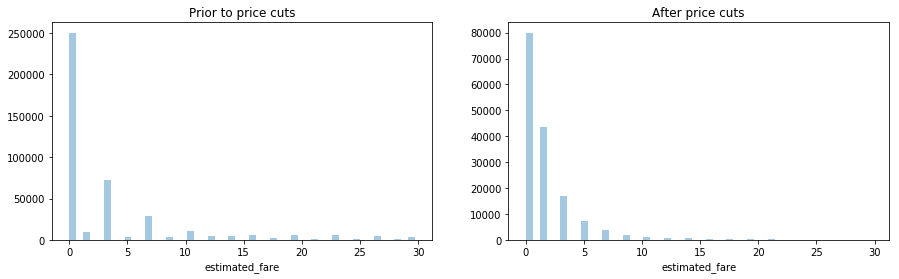

In [68]:
display(bikes_precut['estimated_fare'].rename('Fare prior to price cuts').to_frame().describe().T)
display(bikes_postcut['estimated_fare'].rename('Fare after price cuts').to_frame().describe().T)

# Plotting histograms of estimated fair
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.distplot(bikes_precut['estimated_fare'], ax=axes[0], kde=False)
sns.distplot(bikes_postcut['estimated_fare'], ax=axes[1], kde=False)
axes[0].set_title('Prior to price cuts')
axes[1].set_title('After price cuts');

We can see that these distrbutions/statistics have their similarities and differences. In terms of similarities, they both reveal a similar right skewed shape and adequately reflect their pricing. They each have the majority of the riders paying 0 (which are most likely members who rode under 30 minutes) and gaps depening on their pricing; gaps of 1.75 and 3.50 for pre-cuts and only gaps of 1.75 for post-cuts. The mean price spent prior to cuts is nearly double to that post-cuts!

Lets see if bike ridership increased after price cuts.

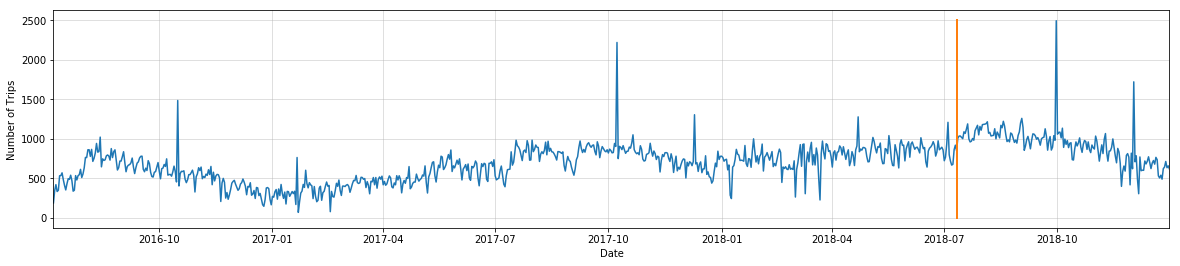

In [69]:
cut = pd.to_datetime(['2018-07-11','2018-07-11'])

# Plot history of trips and plot point of price cut
bikes['start_time'].dt.date.value_counts().plot(figsize=(20, 4))
plt.plot(cut, [0,2500], markersize=10, linewidth=2)
plt.ylabel('Number of Trips')
plt.xlabel('Date')
plt.grid(alpha=.5);

Activity prior to the cuts is the data prior to the orange line and after cuts is everything after. At first glance it seems quite obvious that the price cuts did little to help. However, taking a closer look at the yearly trends, we can see that around July bike ridership begins to decline and pick back up around January. Since these price cuts occured in July, bike ridership naturally began to fall. Lets delve in a little deeper.

In [70]:
# Calculating number and average of trips for each price period

precut_trips = len(bikes_precut)
precut_range = int((bikes_precut['start_time'].max() - fare_precut['start_time'].min()).days)

postcut_trips = len(bikes_postcut)
postcut_range = int((bikes_postcut['start_time'].max() - fare_postcut['start_time'].min()).days)

print('Prior to cut, we had %s trips in the span of %s days.' % (precut_trips, precut_range), end=' ')
print('Averaging about %s trips per day.' % (np.round(precut_trips/precut_range)))

print('After price cut, we had %s trips in the span of %s days.' % (postcut_trips, postcut_range), end=' ')
print('Averaging about %s trips per day.' % (np.round(postcut_trips/postcut_range)))

Prior to cut, we had 420327 trips in the span of 734 days. Averaging about 573.0 trips per day.
After price cut, we had 157858 trips in the span of 172 days. Averaging about 918.0 trips per day.


Surprisingly, we see a huge increase in number of trips after the price cut! Average number of trips per day nearly doubled! Price thus far does seem like a big factor in bike ridership.

Lets see if these price cuts also had an effect on the duration of bike usage.

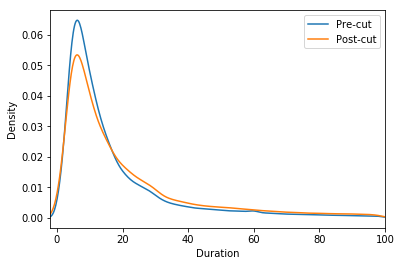

In [108]:
bikes_precut[bikes_precut['duration'] < 100]['duration'].rename('Pre-cut').plot(kind='kde', legend=True)
bikes_postcut[bikes_postcut['duration'] < 100]['duration'].rename('Post-cut').plot(kind='kde', legend=True)
plt.xlim(-2, 100)
plt.xlabel('Duration');

After price cuts, it appears that riders were indeed biking longer than those prior to cuts. We see the proportion of people biking around the 10 minute mark dropped (smaller proportion here) and the proportion after this increased. We can also see a clear divide at the 30 minute mark. After price cuts, people were more willing to pay the new and reduced $1.75 per 30 minute fee!

Therefore, we can see that the price cuts indeed playing a large factor in increasing bike ridership in Los Angeles. Not only do we see a huge increase in the number of trips but people are also biking longer!

Curiosity Question: Since more people are biking at a reduced price, has this ultimately benefited or hurt Metro Bike Share? Lets see how this has affected their revenue.

In [125]:
precut_revenue = bikes_precut['estimated_fare'].sum()
postcut_revenue = bikes_postcut['estimated_fare'].sum()

precut_daily = precut_revenue / 734
postcut_daily = postcut_revenue /172

print('Prior to cut, Metro Bike Share made %s dollars in the span of %s days.' % (precut_revenue, precut_range), end = ' ')
print('Therefore averaging a total of %s dollars a day!' % np.round(precut_daily))

print('After price cut, Metro Bike Share made %s dollars in the span of %s days.' % (postcut_revenue, postcut_range), end = ' ')
print('Therefore averaging a total of %s dollars a day!' % np.round(postcut_daily))

Prior to cut, Metro Bike Share made 1455669.25 dollars in the span of 734 days. Therefore averaging a total of 1983.0 dollars a day!
After price cut, Metro Bike Share made 285176.5 dollars in the span of 172 days. Therefore averaging a total of 1658.0 dollars a day!


We see that Metro Bike Share's revenue decreased from \$1,983 to \$1,658 a day. However, we should take a few things into consideration.
1. We did not include the revenue generated from membership costs as we do not know whether each trip in the table is a unique member. Since the pricing of memberships dropped, as highlighted at the start of this notebook, we can expect more people are willing to purchase a membership which would generate Metro Bike Share more revenue.

2. The data we have for the new pricing is during a time of the year that is not as popular (July-December 2018). We can expect the daily revenue to increase heading into summer 2019.

Overall, we can see these price cuts as a success. More people are biking, biking for longer durations, and is expected to not impact the revenue of the company. With the increased number of people biking, Metro Bike Share could generate more publicity and increase the success of the company and bike ridership in Los Angeles!